In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [3]:
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt').transpose() # для удобства построения графиков
data

array([[ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
         1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
         1916.,  1917.,  1918.,  1919.,  1920.],
       [30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
        22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
        11200.,  7600., 14600., 16200., 24700.],
       [ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
         8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
        29700., 15800.,  9700., 10100.,  8600.],
       [48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
        44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
        36700., 41800., 43300., 41300., 47300.]])

1) Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

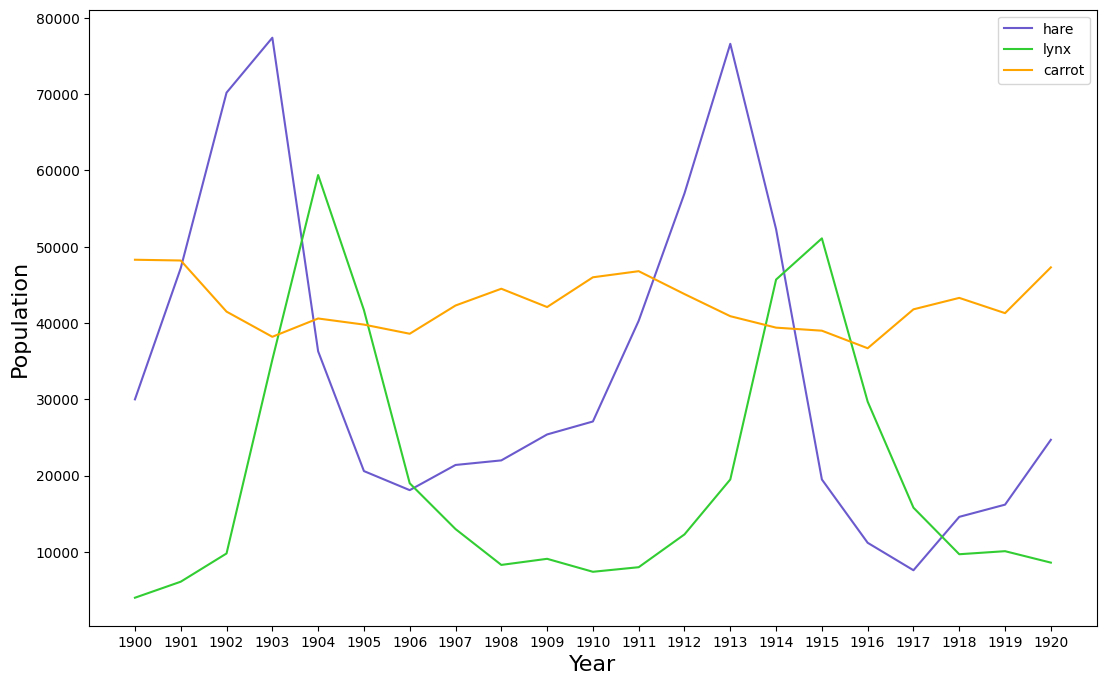

In [4]:
fig, ax = plt.subplots(figsize =(13,8))
plt.xticks(data[0])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Population', fontsize = 16, rotation = 90)

animals = ['hare', 'lynx', 'carrot']
iterator_color = dict({1: 'slateblue', 2: 'limegreen', 3 : 'orange'})

for i in range(1, 4):
    plt.plot(data[0], data[i], color=iterator_color[i])

plt.legend(labels=animals)
plt.show()

2. Find which year each species had the largest population. Mark these years in the plot of populations.

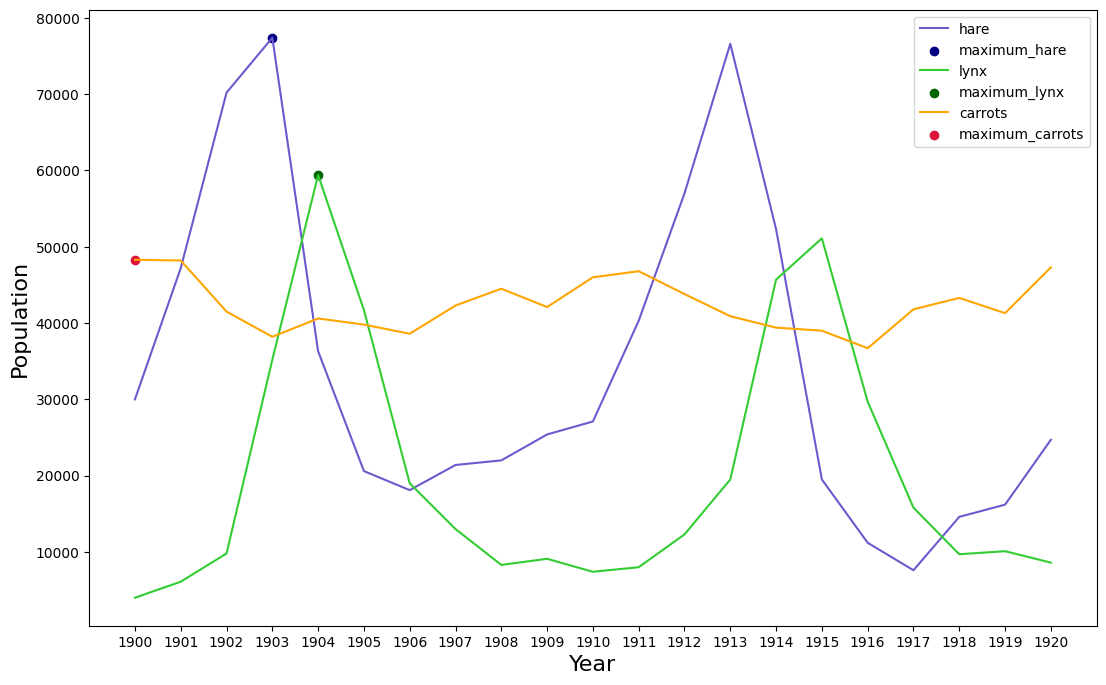

In [5]:
fig, ax = plt.subplots(figsize =(13,8))
plt.xticks(data[0])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Population', fontsize = 16, rotation = 90)


animals_and_max =['hare', 'maximum_hare', 'lynx', 'maximum_lynx', 'carrots', 'maximum_carrots']
iterator_color = dict({1: 'slateblue', 2: 'limegreen', 3 : 'orange'})
scatter_color = dict({1: 'navy', 2: 'darkgreen', 3 : 'crimson'})

for i in range(1, 4):
    plt.plot(data[0], data[i], color=iterator_color[i])

    index_maximum = data[i].argmax()
    plt.scatter(data[0][index_maximum], data[i][index_maximum], color=scatter_color[i])

plt.legend(labels=animals_and_max)
plt.show()

3. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

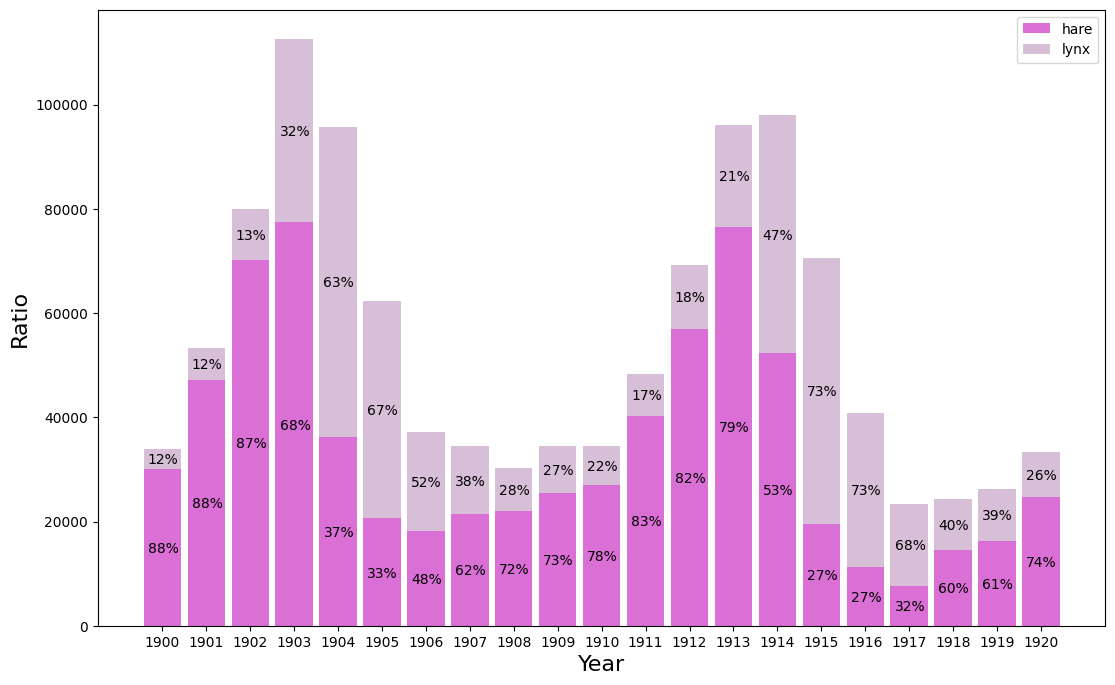

In [6]:
fig, ax = plt.subplots(figsize =(13,8))
plt.xticks(data[0])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Ratio', fontsize = 16, rotation = 90)

animals = ['hare', 'lynx']
length = data[0].shape[0]

dict_percentage = dict()

for i in range(length): # таблица с процентами
    dict_percentage[data[0][i]] = [np.floor((data[1][i]/(data[1][i] + data[2][i])) * 100)/100, (np.ceil(data[2][i]/(data[1][i] + data[2][i])*100))/100]

for i in range(length):
    plt.bar(data[0], data[1], color = 'orchid', width = 0.85)
    plt.bar(data[0], data[2], bottom = data[1], color = 'thistle', width = 0.85)
    plt.text(data[0][i]-0.333, data[1][i]/2 - 1000, f'{int(dict_percentage[data[0][i]][0]*100)}%')
    plt.text(data[0][i]-0.333, data[1][i] + data[2][i]/2 - 1000, f'{int(dict_percentage[data[0][i]][1]*100)}%', color = 'black')
plt.legend(labels=animals)
plt.show()

4. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

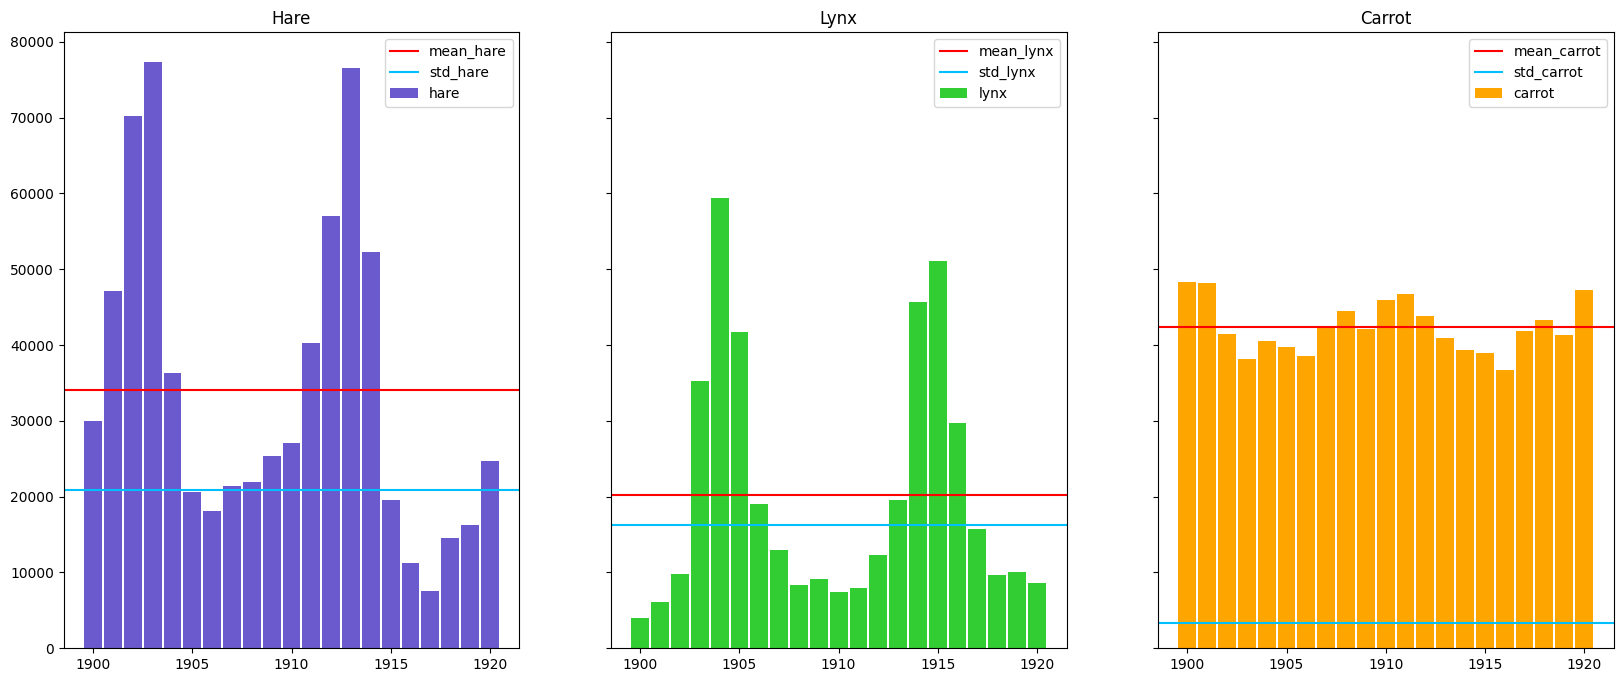

In [7]:
mean_hare, std_hare = np.mean(data[1]), np.std(data[1])
mean_lynx, std_lynx = np.mean(data[2]), np.std(data[2])
mean_carrot, std_carrot = np.mean(data[3]), np.std(data[3])


fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (20, 8), sharey='row')

ax1.bar(data[0], data[1], label='Hare', width = 0.9, color = 'slateblue')
ax1.axhline(y = mean_hare, color = 'red', linestyle = '-')
ax1.axhline(y = std_hare, color = 'deepskyblue', linestyle = '-')
ax1.legend(('mean_hare', 'std_hare', 'hare'))
ax1.set_title('Hare')


ax2.bar(data[0], data[2], label='Lynx', width = 0.9, color = 'limegreen')
ax2.axhline(y = mean_lynx, color = 'red', linestyle = '-')
ax2.axhline(y = std_lynx, color = 'deepskyblue', linestyle = '-')
ax2.legend(('mean_lynx', 'std_lynx', 'lynx'))
ax2.set_title('Lynx')

ax3.bar(data[0], data[3], label='Carrot', width = 0.9, color = 'orange')
ax3.axhline(y = mean_carrot, color = 'red', linestyle = '-')
ax3.axhline(y = std_carrot, color = 'deepskyblue', linestyle = '-')
ax3.legend(('mean_carrot', 'std_carrot', 'carrot'))
ax3.set_title('Carrot')


plt.show()

5. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

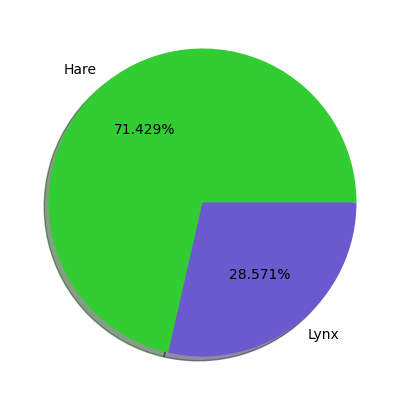

In [8]:
length = data.shape[1]
A = ['H' for i in range(length)]
colors = ['limegreen', 'slateblue']

for j in range(length):
    if (data[1][j] < data[2][j]):
        A[j] = 'L'
animal_amount = dict({'Hare': A.count('H'), 'Lynx': A.count('L')})
plt.figure(figsize=(5,5))
plt.pie(x = animal_amount.values(), labels= animal_amount.keys(), colors = colors, autopct='%.3f%%', shadow=True)
plt.show()

6. Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

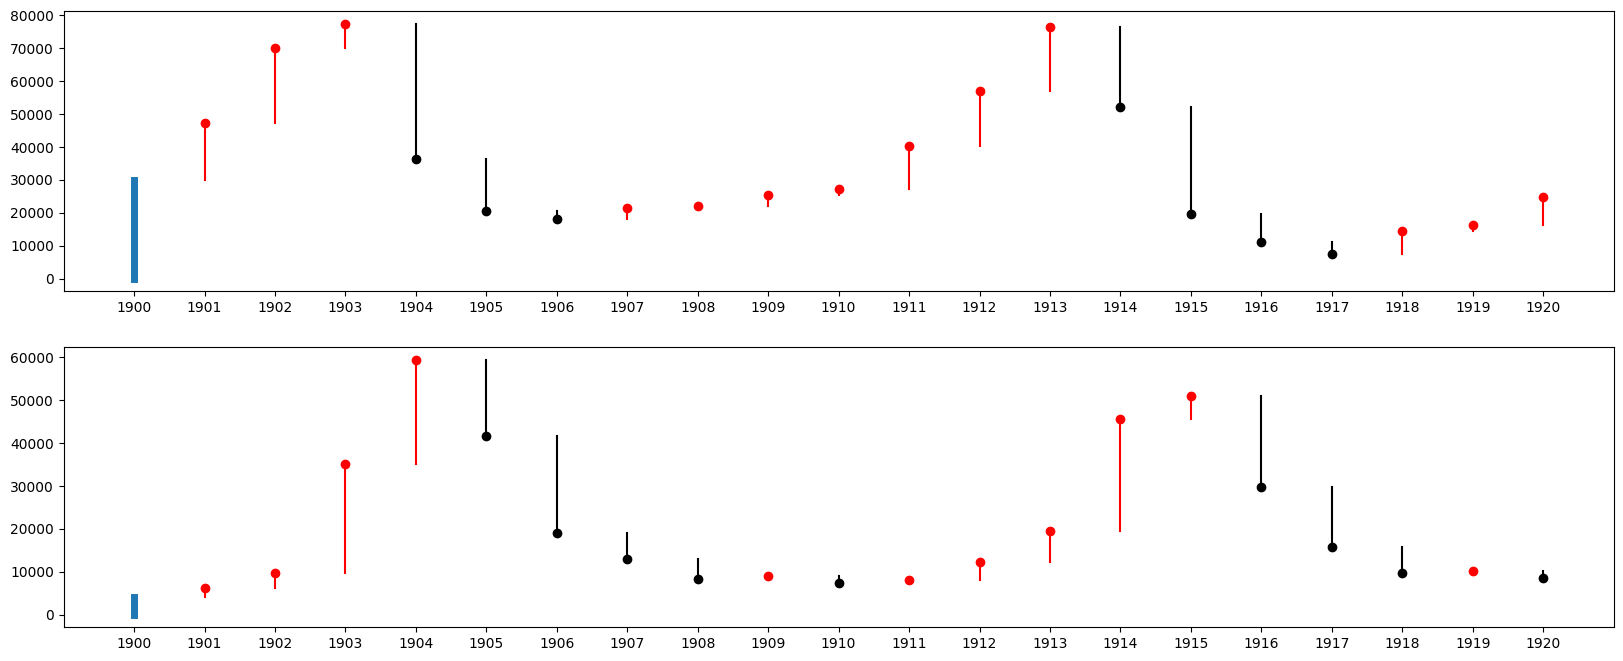

In [72]:
df = pd.DataFrame({'hare': data[1], 'lynx': data[2]})
corr_matrix = df.corr()
coefficient = corr_matrix['hare']['lynx'] # коэффициент корреляции

length = data.shape[1]
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize = (20, 8), sharey='row')

ax1.plot([data[0][0], data[0][0]], [0, data[1][0]], linewidth=5)
ax1.set_xticks(data[0])
for i in range(1, length):
    if (data[1][i] > data[1][i-1]):
        y_minimum = data[1][i-1]
        y_maximum = data[1][i]
        ax1.plot([data[0][i], data[0][i]], [y_minimum,  y_maximum], color = 'red')
        ax1.scatter(data[0][i], y_maximum, color = 'red')
    else:
        y_minimum = data[1][i]
        y_maximum = data[1][i-1]
        ax1.plot([data[0][i], data[0][i]], [y_minimum, y_maximum], color = 'black')
        ax1.scatter(data[0][i], y_minimum, color = 'black')

ax2.plot([data[0][0], data[0][0]], [0, data[2][0]], linewidth=5)
ax2.set_xticks(data[0])
for i in range(1, length):
    if (data[2][i] > data[2][i-1]):
        y_minimum = data[2][i-1]
        y_maximum = data[2][i]
        ax2.plot([data[0][i], data[0][i]], [y_minimum,  y_maximum], color = 'red')
        ax2.scatter(data[0][i], y_maximum, color = 'red')
    else:
        y_minimum = data[2][i]
        y_maximum = data[2][i-1]
        ax2.plot([data[0][i], data[0][i]], [y_minimum, y_maximum], color = 'black')
        ax2.scatter(data[0][i], y_minimum, color = 'black')
# динамика изменения популяции; красный - рост до точки, черный - падение до точки

7. Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

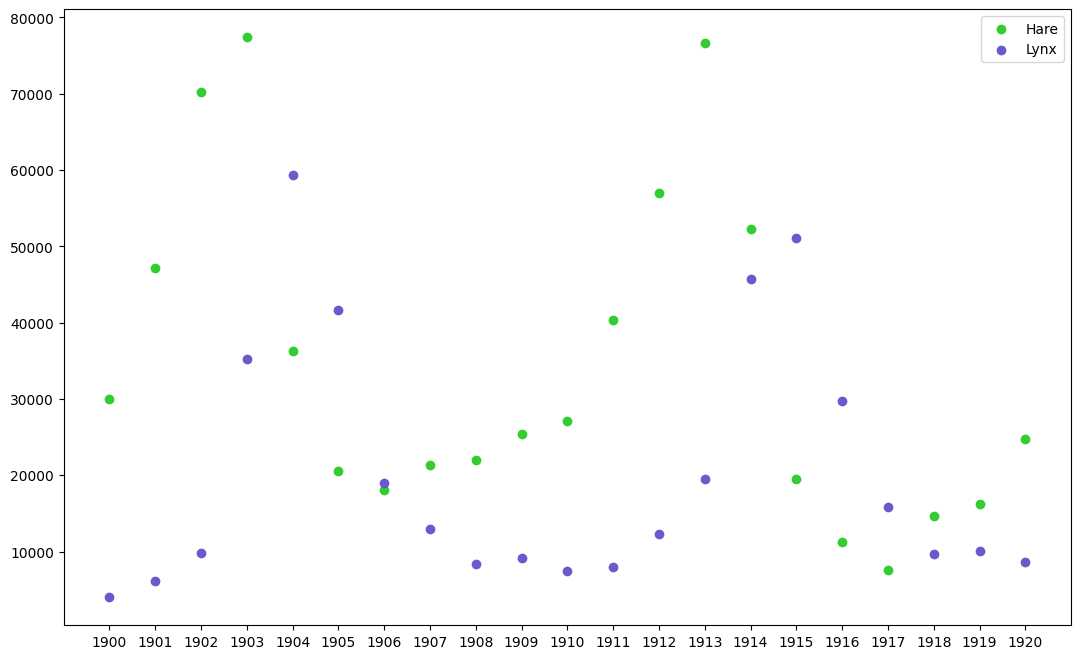

In [79]:
fig, ax = plt.subplots(figsize=(13,8))
plt.xticks(data[0])

plt.scatter(data[0], data[1], color = 'limegreen')
plt.scatter(data[0], data[2], color = 'slateblue')

plt.legend(labels=['Hare', 'Lynx'])
plt.show()

8. Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [94]:
# можно попробовать интерполяцию, имеющуюся в библиотеке numpy
x = data[0][:-1]
y = data[1][:-1]
x_val = 1920
y_interp = np.interp(x_val, x, y)
error = math.fabs(y_interp - data[1][-1])/data[1][-1]
print(f'Error is equal {error*100} %')
# да, могло быть и лучше, конечно

Error is equal 34.41295546558704 %


Let's practice: k-Nearest Neighbor (kNN) classification

In [6]:
from statistics import mode
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

C:\Users\v_dul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
def func(X_train, X_test, y_train, k):
    answer = []
    for test in X_test:
        d = np.sum(np.sqrt((test - X_train)**2), axis=1)
        labels = y_train[np.argsort(d)[:k]]
        answer.append(mode(labels))
    return np.array(answer)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

images_train = images[:1000]
labels_train = labels[:1000]

images_test = images[-100:]
labels_test = labels[-100:]

In [ ]:
k_best = 1
answer_accuracy = 0
for k in range(1, 1001):
    model = func(images_train, images_test, labels_train, k)
    accuracy = accuracy_score(labels_test, model)
    if (accuracy > answer_accuracy):
        answer_accuracy = accuracy
        k_best = k

In [ ]:
print("Best k equals ", k_best)
print("Accuracy equals ", sklearn.metrics.accuracy_score(labels_test, func(images_train, images_test, labels_train, k_best)))